In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("fivethirtyeight")
sns.set_style('whitegrid')
%matplotlib inline
plt.rcParams.update({'font.size': 15})

# Reading stock data from yahoo
from pandas_datareader.data import DataReader
from datetime import datetime
import yfinance as yf

# Collecting Data

In [ ]:
# Tech list
tech_list = ['MSFT', 'DUK', 'NVDA', 'SO']

# Set start and end time for data grab
end = '2023-12-15'
start = '2022-11-30'

# Grabing yahoo finance data
for stock in tech_list:
    # Set DataFrame as the Stock Ticker
    globals()[stock] = yf.download(stock,  start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
company_list = [MSFT, DUK, NVDA, SO]
company_name = ["M", "DUK", 'NVDA', 'SO']
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

# Trend Analysis

## Adjusted Closing Price

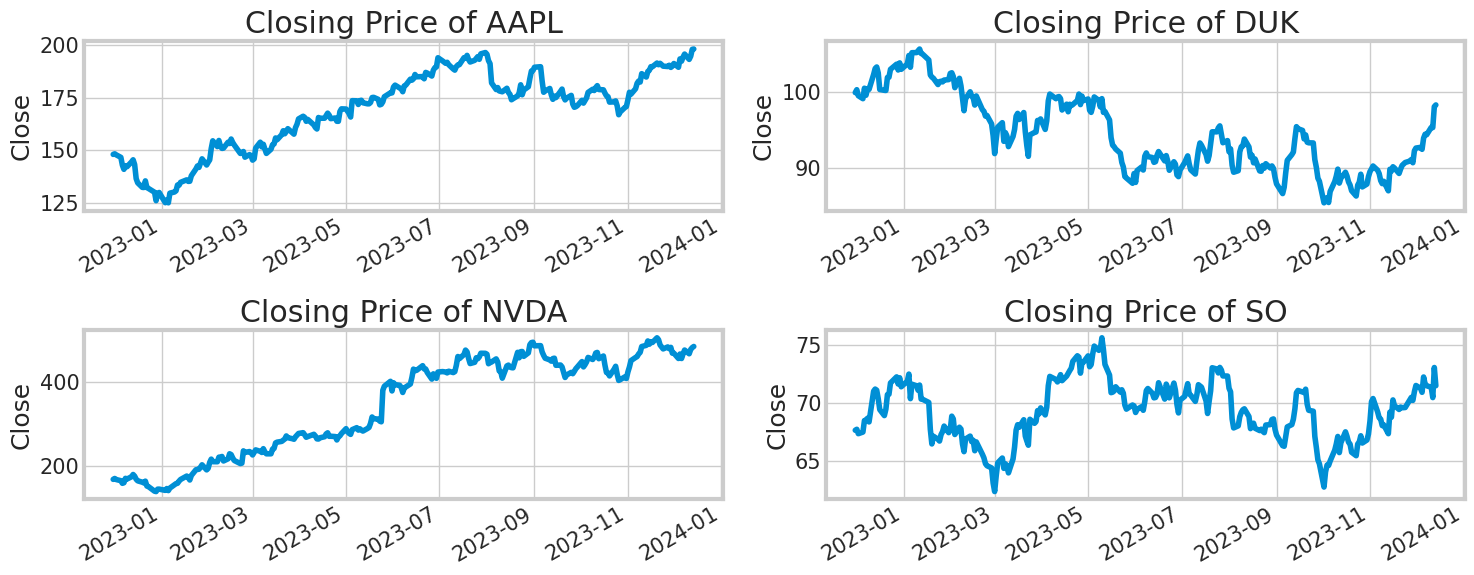

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i]}")

plt.tight_layout()

## Daily Return

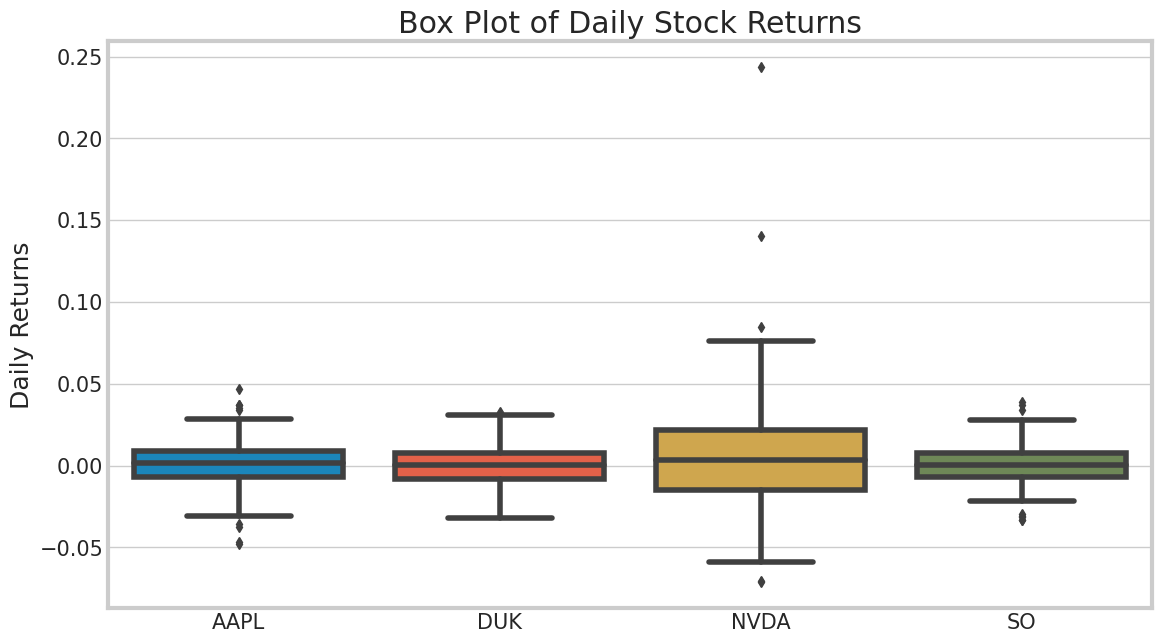

In [ ]:
# Calculating daily returns
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Concatenating the returns into a single DataFrame
all_returns = pd.concat([company['Daily Return'] for company in company_list], axis=1)
all_returns.columns = company_name

# Plotting
plt.figure(figsize=(12, 7))
sns.boxplot(data=all_returns)
plt.title('Box Plot of Daily Stock Returns')
plt.ylabel('Daily Returns')
plt.show()


## Correlation

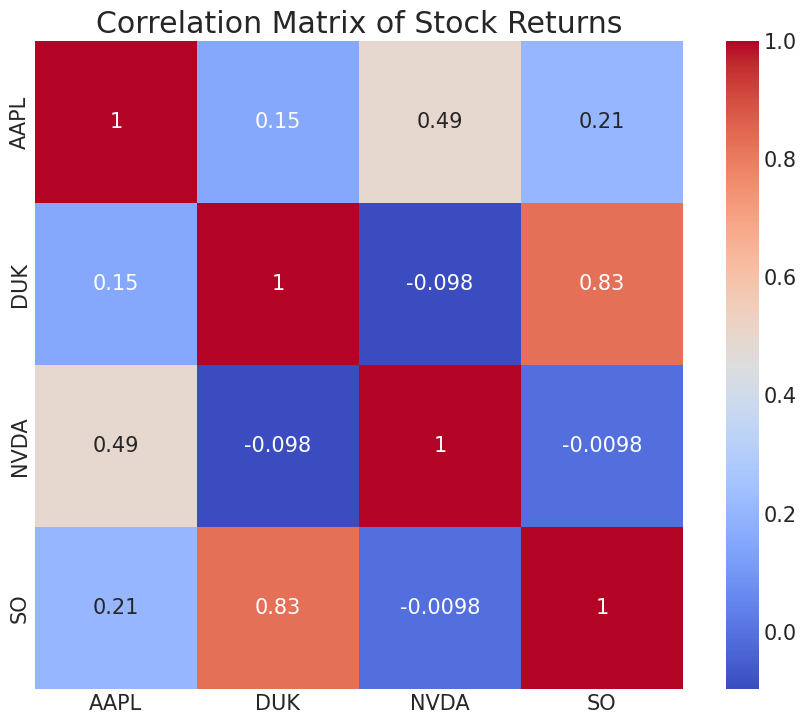

In [ ]:
# Calculating the correlation matrix
corr_matrix = all_returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Stock Returns')
plt.show()


# Cumulative Return

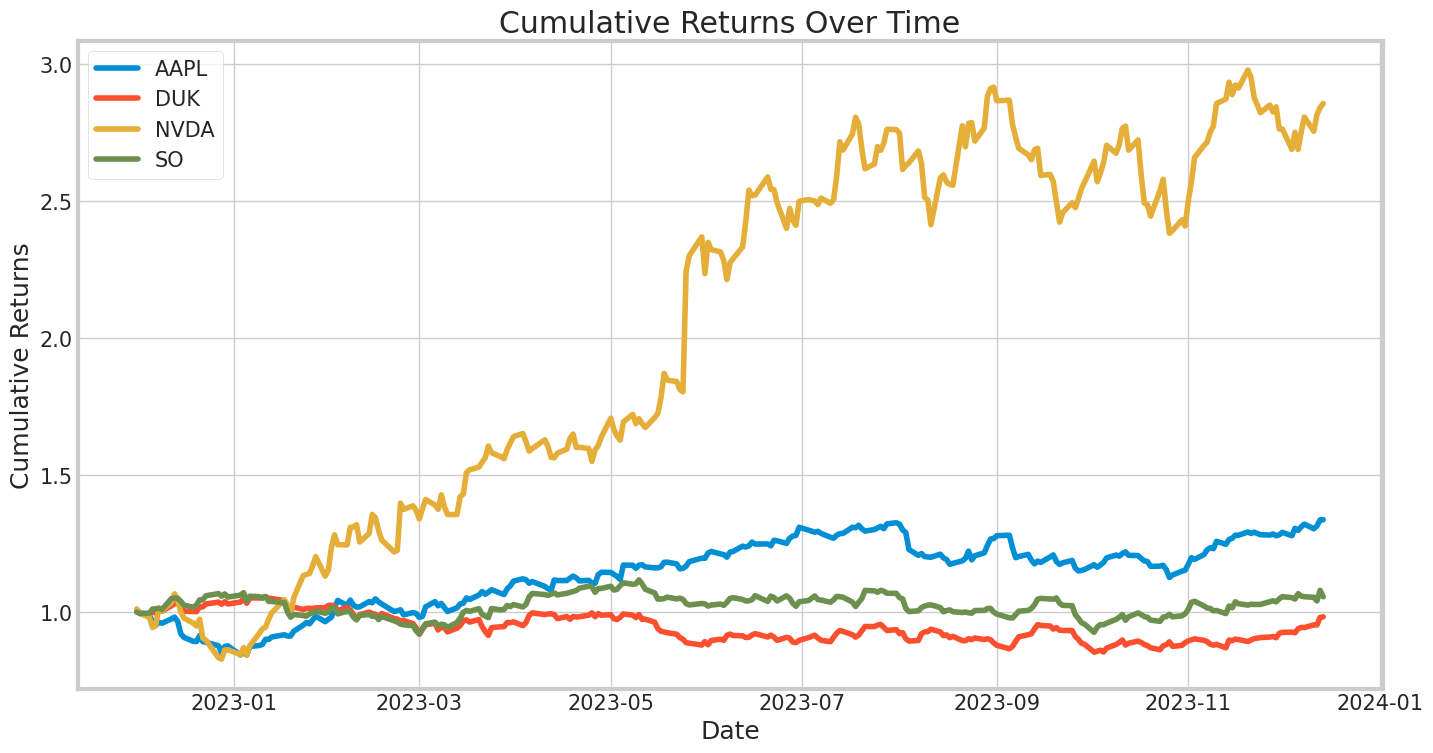

In [ ]:
plt.figure(figsize=(15, 8))

for company, name in zip(company_list, company_name):
    cumulative_return = (1 + company['Daily Return']).cumprod()
    plt.plot(cumulative_return, label=name)

plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()



# Volatility Analysis

## Daily return of stock on average

ValueError: ignored

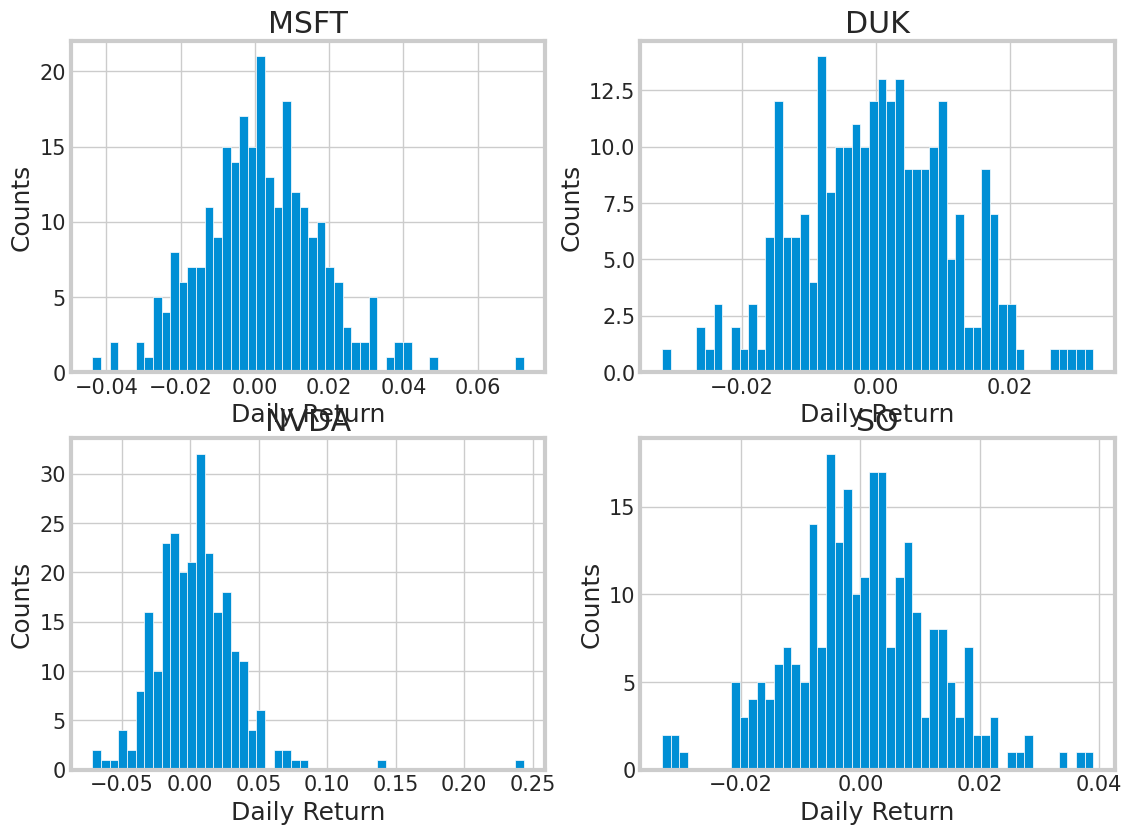

In [40]:
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list):
    plt.subplot(2, 2, i+1)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i]}')

plt.tight_layout()

## Rolling Standard Deviation

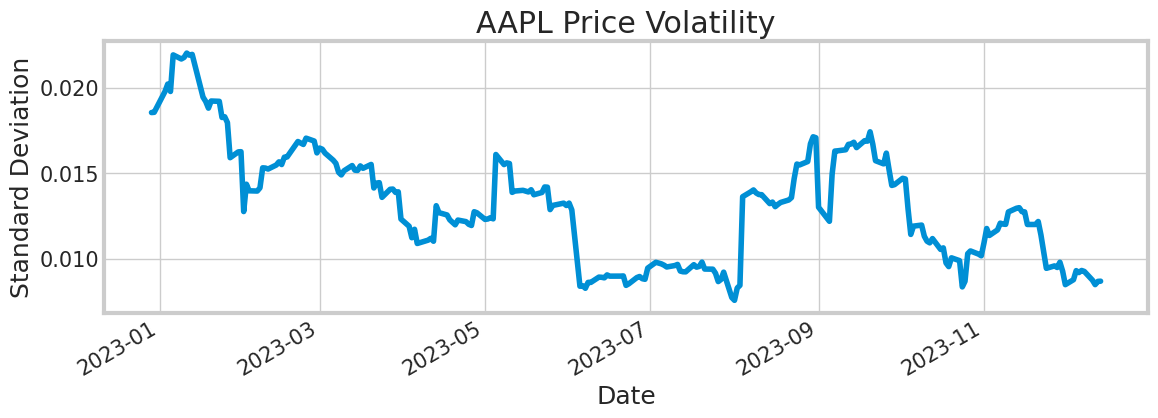

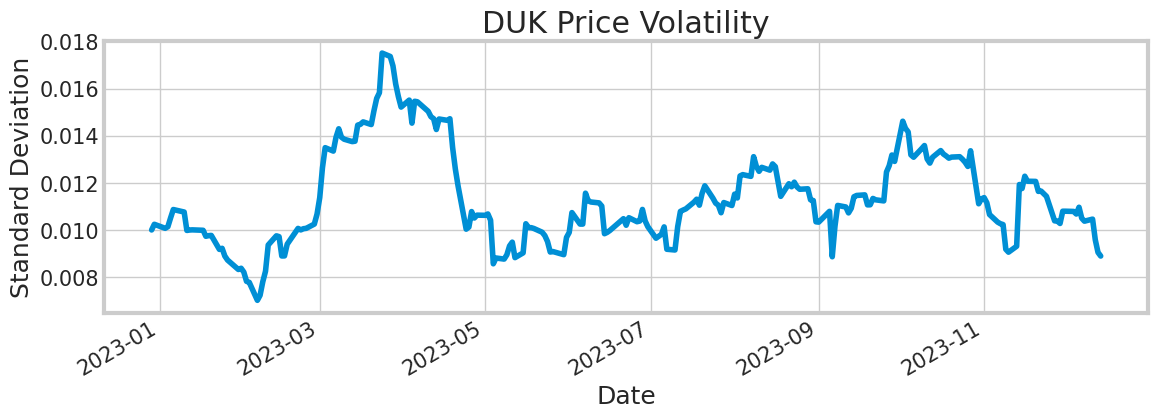

In [ ]:
for i, company in enumerate(company_list):
    plt.figure(figsize=(12, 4))
    company['Rolling Std'] = company['Daily Return'].rolling(window=rolling_window).std()
    company['Rolling Std'].plot()
    plt.title(f'{company_name[i]} Price Volatility')
    plt.ylabel('Standard Deviation')


# Anomaly Detection

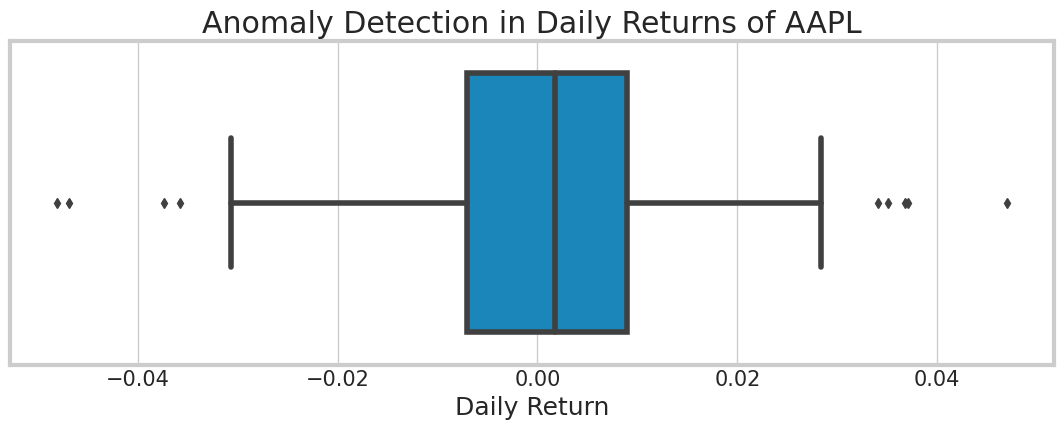

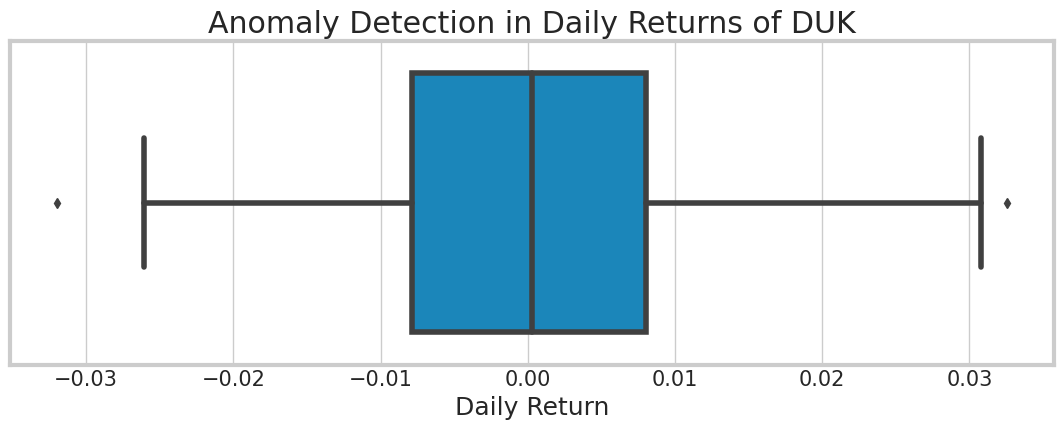

In [ ]:
for i, company in enumerate(company_list):
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=company['Daily Return'])
    plt.title(f'Anomaly Detection in Daily Returns of {company_name[i]}')
    plt.xlabel('Daily Return')